## Dataset Issues

There are 3 outstanding issues within the dataset
- naming conventions
- standardization
- duplicates

The naming conventions for things could be better (more meaningful)/some aren't being used (ex. accessibility -> all empty values) and the data that is repetitive should be standardized (ie. 'Jill Z' vs 'Jill Z.'). I managed to remove the duplicates, but there are 3 cases for duplicates; 

case 1: same ID, same title, different contents

case 2: same ID, different title

case 3: different title, same ID


I cannot resolve case 1, because I cannot isolate the outliers reliably and I don't know which contents is reliable. 

In [27]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [28]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# New Content Inventory Cleaning

In [29]:
# Import data
data = pd.read_csv(r"New Content Inventory.csv")

In [30]:
# see all columns
pd.set_option('max_columns', None)

In [31]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Allows us to identify objects that are duplicated in the database, and link Digital Lab-generated ID#s to the objects in this spreadsheet",These are the titles of the objects; can include terms in search filter; include on blade.,This column lets us know what work needs to be done for the object to be web-ready,"Part of algorthim prompting updates to content, so the appropriate person is alerted/contacted",Use for algorithm to prompt updates to objects. These would be back-up people to support updates,"only relevant when the object is not yet web-ready, or needs revisions (does not need to be part of database).",internal use to allow us to track progress on updates to make objects web-ready,For new or not yet updated content:,Include in algorithm to prompt updates so we know where to go (i.e. the program is responsible for maintaining the object),Info to include on blade,Info to include on blade.1,Exclude from search terms; For internal use only (no longer to appear on the blade),Exclude from search term; Content - include on blade,Exclude from search terms; Include on blade to allow users to access the external resource,For algorithm to prompt us to update object for currency,Unnamed: 24,"No longer using this tag, in order to simplify the user experience",This info appears on the blade but no longer being used as a filter in order to simplify the user experience,For internal use so the person uploading the resource knows what type of file format to save it in or look for to upload,Navigation,Navigation.1,Navigation.2,Navigation.3,Navigation.4,Navigation.5,Navigation.6,Navigation.7,Navigation.8,Navigation.9,For team to reference when tagging information hierarchy,Content to include on blade; exclude from search terms,Filter,Filter.1,Search terms,Filter.2,Toggle for audience (clinician vs. family),Recommended for you' tag (algorithm for proposing new resources for the user to explore),For internal use in the database.,Used within algorithm to prompt updates to objects - directs us to the relevant content expert,Filter.3,This information can populate a field on the 'blades' for each object,This is the order of resources as of 2021Sep9. Delete this when it's not needed anymore,Thumbnail images for each object for users to see when browsing,Content - object 'rating' based on accessibility characteristics. Rating levels TBD. Could be on the blades or could be an icon on the thumbnail view (advise as to which is best approach),"Exclude from search terms; filter, could be part of advanced search; can include as info on blade",Unnamed: 54
0,"X (refer to legend in row 1, column A for deta...",X,X,X,X,X,X,X,X,ID,E,X,ID,ID,I,X,ID,ID,ID,E,E,E,E,ID,E,E,E,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,X,Tags,NaN,NaN,NaN,NaN,E,E,ID,ID,E,E,X,E,E,X,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,For new or not yet updated content:,NaN,NaN,NaN,NaN,NaN,SOURCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,E,E,ID,Relationship to other resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Date Inclusion Criteria Reviewed (1st meeting ...,Inclusion Criteria 1: Relevance,Inclusion Criteria 2: Authority/Credibility,Inclusion Criteria 3: Currency,Inclusion Criteria 4: Objectivity/Conflict of ...,Inclusion Criteria 5: Evidence-based/informed,Inclusion Criteria 6: Readability/Accessibilit...,Content has been vetted (Y/N),Content has been formatted (Y/N),Inventory ID,Title,Status,Person responsible,Others involved,Required work,Lit search request date,Target completion date,Program to follow-up with (SH/BCCH program res...,External,Author(s) (or name of org. if no author),Date created,Date of last update (©related to website that ...,Link,Date Link Checked,Target Audience,Profession,Resource type,File Format,Master Tag (Level 1),Level 2A,Level 3A,Level 4A,Level 2B,Level 3B,Level 4B,Level 2C,Level 3C,Level 4C,Old Master Tag (Leve

In [32]:
data.loc[[2]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Allows us to identify objects that are duplicated in the database, and link Digital Lab-generated ID#s to the objects in this spreadsheet",These are the titles of the objects; can include terms in search filter; include on blade.,This column lets us know what work needs to be done for the object to be web-ready,"Part of algorthim prompting updates to content, so the appropriate person is alerted/contacted",Use for algorithm to prompt updates to objects. These would be back-up people to support updates,"only relevant when the object is not yet web-ready, or needs revisions (does not need to be part of database).",internal use to allow us to track progress on updates to make objects web-ready,For new or not yet updated content:,Include in algorithm to prompt updates so we know where to go (i.e. the program is responsible for maintaining the object),Info to include on blade,Info to include on blade.1,Exclude from search terms; For internal use only (no longer to appear on the blade),Exclude from search term; Content - include on blade,Exclude from search terms; Include on blade to allow users to access the external resource,For algorithm to prompt us to update object for currency,Unnamed: 24,"No longer using this tag, in order to simplify the user experience",This info appears on the blade but no longer being used as a filter in order to simplify the user experience,For internal use so the person uploading the resource knows what type of file format to save it in or look for to upload,Navigation,Navigation.1,Navigation.2,Navigation.3,Navigation.4,Navigation.5,Navigation.6,Navigation.7,Navigation.8,Navigation.9,For team to reference when tagging information hierarchy,Content to include on blade; exclude from search terms,Filter,Filter.1,Search terms,Filter.2,Toggle for audience (clinician vs. family),Recommended for you' tag (algorithm for proposing new resources for the user to explore),For internal use in the database.,Used within algorithm to prompt updates to objects - directs us to the relevant content expert,Filter.3,This information can populate a field on the 'blades' for each object,This is the order of resources as of 2021Sep9. Delete this when it's not needed anymore,Thumbnail images for each object for users to see when browsing,Content - object 'rating' based on accessibility characteristics. Rating levels TBD. Could be on the blades or could be an icon on the thumbnail view (advise as to which is best approach),"Exclude from search terms; filter, could be part of advanced search; can include as info on blade",Unnamed: 54
2,Date Inclusion Criteria Reviewed (1st meeting ...,Inclusion Criteria 1: Relevance,Inclusion Criteria 2: Authority/Credibility,Inclusion Criteria 3: Currency,Inclusion Criteria 4: Objectivity/Conflict of ...,Inclusion Criteria 5: Evidence-based/informed,Inclusion Criteria 6: Readability/Accessibilit...,Content has been vetted (Y/N),Content has been formatted (Y/N),Inventory ID,Title,Status,Person responsible,Others involved,Required work,Lit search request date,Target completion date,Program to follow-up with (SH/BCCH program res...,External,Author(s) (or name of org. if no author),Date created,Date of last update (©related to website that ...,Link,Date Link Checked,Target Audience,Profession,Resource type,File Format,Master Tag (Level 1),Level 2A,Level 3A,Level 4A,Level 2B,Level 3B,Level 4B,Level 2C,Level 3C,Level 4C,Old Master Tag (Level 1),Description,Health condition,Area of Focus,Keywords (see tags tab for information),Learning Event? (Y/N),Corresponding clinician/parent resource,Sibling resources e.g. next steps,Notes,Person recommending,Age,Location,NaN,Thumbnails,Accessibility,Audience level (tag names TBC),NaN


In [33]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Allows us to identify objects that are duplicated in the database, and link Digital Lab-generated ID#s to the objects in this spreadsheet',
       'These are the titles of the objects; can include terms in search filter; include on blade.',
       'This column lets us know what work needs to be done for the object to be web-ready ',
       'Part of algorthim prompting updates to content, so the appropriate person is alerted/contacted',
       'Use for algorithm to prompt updates to objects. These would be back-up people to support updates',
       'only relevant when the object is not yet web-ready, or needs revisions (does not need to be part of database). ',
       'internal use to allow us to track progress on updates to make objects web-ready',
       'For new or not yet updated content: ',
       'Include in algorithm to prompt updates

In [34]:
# drop columns that contain 'x'
data = data.drop([
    'Unnamed: 0', 
    'Unnamed: 1',
    'Unnamed: 2',
    'Unnamed: 3',
    'Unnamed: 4',
    'Unnamed: 5',
    'Unnamed: 6',
    'Unnamed: 7',
    'Unnamed: 8',
    'This column lets us know what work needs to be done for the object to be web-ready ',
    'internal use to allow us to track progress on updates to make objects web-ready',
    'No longer using this tag, in order to simplify the user experience',
    'This info appears on the blade but no longer being used as a filter in order to simplify the user experience',
    'For team to reference when tagging information hierarchy',
    'This is the order of resources as of 2021Sep9. Delete this when it\'s not needed anymore',
    'Exclude from search terms; filter, could be part of advanced search; can include as info on blade',
    'Unnamed: 54'
], axis = 1)

In [35]:
data = data.drop([0, 1, 2])
data = data.reset_index(drop=True)

In [36]:
new_data = data.copy()

In [37]:
new_data.columns = [
    'Inventory ID',
    'Title',
    'Person responsible',
    'Others involved',
    'Required work',
    'Target completion date',
    'Program to follow-up with (SH/BCCH program responsible)',
    'External',
    'Author(s) (or name of org. if no author)',
    'Date created',
    'Date of last update (©related to website that is linked, not necessarily the resource)',
    'Link',
    'Date Link Checked',
    'Target Audience',
    'File Format',
    'Master Tag (Level 1)',
    'Level 2A',
    'Level 3A',
    'Level 4A',
    'Level 2B',
    'Level 3B',
    'Level 4B',
    'Level 2C',
    'Level 3C',
    'Level 4C',
    'Description',
    'Health condition',
    'Area of Focus',
    'Keywords (see tags tab for information)',
    'Learning Event?  (Y/N)',
    'Corresponding clinician/parent resource',
    'Sibling resources e.g. next steps',
    'Notes',
    'Person recommending',
    'Age',
    'Location',
    'Thumbnails',
    'Accessibility',
]

In [38]:
new_data

,Inventory ID,Title,Person responsible,Others involved,Required work,Target completion date,Program to follow-up with (SH/BCCH program responsible),External,Author(s) (or name of org. if no author),Date created,"Date of last update (©related to website that is linked, not necessarily the resource)",Link,Date Link Checked,Target Audience,File Format,Master Tag (Level 1),Level 2A,Level 3A,Level 4A,Level 2B,Level 3B,Level 4B,Level 2C,Level 3C,Level 4C,Description,Health condition,Area of Focus,Keywords (see tags tab for information),Learning Event? (Y/N),Corresponding clinician/parent resource,Sibling resources e.g. next steps,Notes,Person recommending,Age,Location,Thumbnails,Accessibility
0,1,[insert other DCD Advocacy Toolkit resources] ...,Stephanie,Jill Z.,Review to ensure web-ready; add tags,NaN,NaN,Internal,"Ivonne M. , OT & Stephanie G. , OT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DCD,NaN,NaN,N,Management of Developmental Coordination Disor...,DCD saved search; DCD management brief overview,NaN,Ivonne M.,NaN,NaN,NaN,NaN
1,2,2020 Child-Bright Virtual Symposium Session Re...,Claire/Salina,NaN,NaN,NaN,NaN,External,Child-Bright Network and Strategy for Patient-...,2020,2022,https://www.child-bright.ca/virtual-symposium,"May 31, 2022","clinicians, researchers, families/caregivers",Web link,Making Treatment Choices,"Learn About Treatment, Care and Activities","Function, Activity and 'How To' Resources",NaN,"Learn About Treatment, Care and Activities",Health Condition-specific Resources,NaN,NaN,NaN,NaN,The 2020 CHILD-BRIGHT Virtual Symposium was a ...,Other,NaN,"webinars, congenital heart disease, genomic te...",Y,N,N,NaN,Kim,All,Canada-Wide,NaN,NaN
2,3,360 Cognitive Connections,Claire,NaN,NaN,NaN,NaN,External,NaN,NaN,NaN,https://www.efpractice.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michelle L.,NaN,NaN,NaN,NaN
3,4,5. Plan A: Standardized measures of IQ and dev...,Claire,NaN,NaN,NaN,NaN,Internal,Jennifer Engle (BC Campus),NaN,NaN,https://pressbooks.bccampus.ca/jengle/chapter/...,"September 9, 2021",clinicians,web link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resource that aids in understanding factors to...,no specific diagnosis,NaN,"assessment, test, IQ, disability, special popu...",N,NaN,NaN,NaN,Jen E.,All,NaN,NaN,NaN
4,6,A Clinical Application Guide to Standardized W...,Debbie,NaN,NaN,NaN,Positioning Mobility Team,External,University of Colorado Denver,2013,NaN,https://www1.ucdenver.edu/centers/center-for-i...,May 31-21,"clinicians, researchers",web link,"Services, Supports & Community Resources",Learn About Assessments,Other Assessment Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resources that promote the adoption and use of...,"Cerebral palsy , Brain injury, concussion, Dev...","Positioning, mobility, lower body, Assistive t...","wheelchair, mobility, assistive device, evalua...",N,N,NaN,NaN,Debbie,All,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,1599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


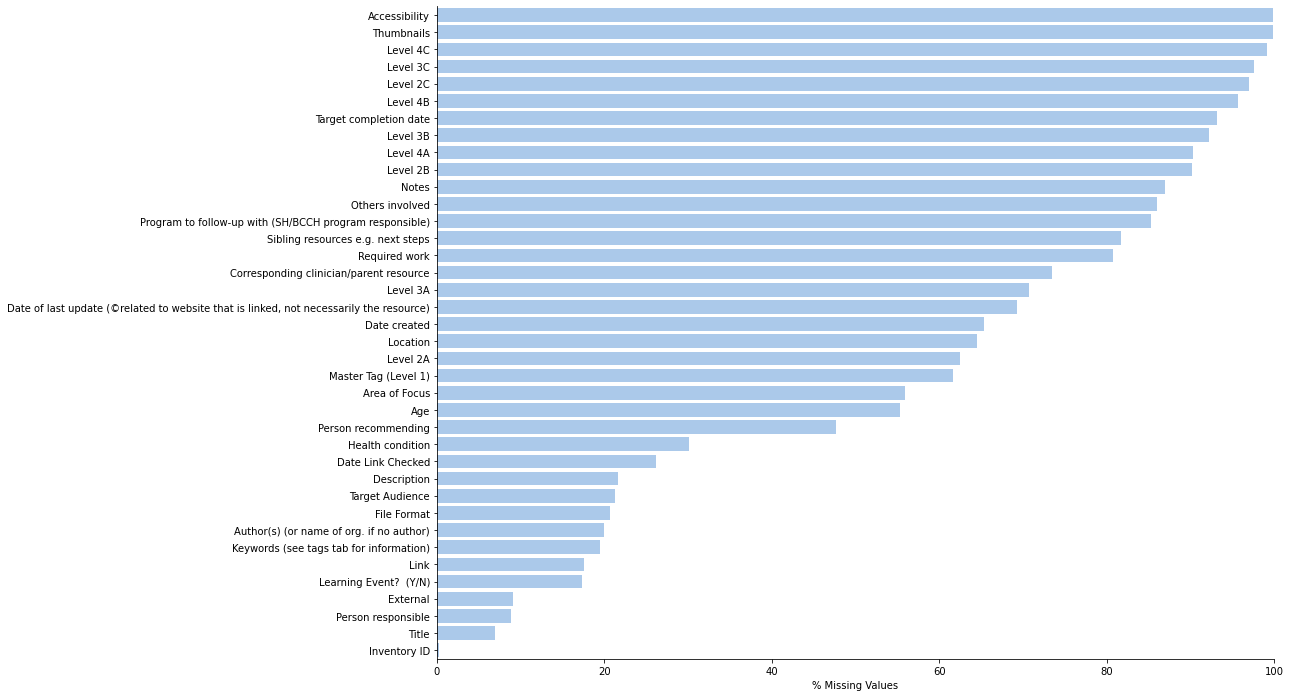

In [39]:
#plotting the percentage of missing values in each column
data_length = len(new_data)
data_null = (new_data.isnull().sum().sort_values(ascending=False)*100/len(new_data))
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="",
       xlabel="% Missing Values")
sns.barplot(x=data_null.values, y=data_null.index, color="b")
sns.despine()

In [40]:
new_data = new_data.drop([
    'Accessibility',
    'Thumbnails'
], axis = 1)

In [41]:
'''
new_data.rename(columns = {
    'Inventory ID':'Allows us to identify objects that are duplicated in the database, and link Digital Lab-generated ID#s to the objects in this spreadsheet',
    'Title':'These are the titles of the objects; can include terms in search filter; include on blade.',
    'Person responsible':'Part of algorthim prompting updates to content, so the appropriate person is alerted/contacted',
    'Others involved':'Use for algorithm to prompt updates to objects. These would be back-up people to support updates',
    'Required work':'only relevant when the object is not yet web-ready, or needs revisions (does not need to be part of database). ',
    'Target completion date':'For new or not yet updated content: ',
    'Program to follow-up with (SH/BCCH program responsible)':'Include in algorithm to prompt updates so we know where to go  (i.e. the program is responsible for maintaining the object)',
    'External':'Info to include on blade',
    'Author(s) (or name of org. if no author)':'Info to include on blade',
    'Date created':'Exclude from search terms; For internal use only (no longer to appear on the blade)',
    'Date of last update (©related to website that is linked, not necessarily the resource)':'Exclude from search term; Content - include on blade',
    'Link':'Exclude from search terms; Include on blade to allow users to access the external resource',
    'Date Link Checked':'For algorithm to prompt us to update object for currency',
    'Target Audience':'Unnamed: 24',
    'File Format':'For internal use so the person uploading the resource knows what type of file format to save it in or look for to upload',
    'Master Tag (Level 1)':'Navigation',
    'Level 2A':'Navigation.1',
    'Level 3A':'Navigation.2',
    'Level 4A':'Navigation.3',
    'Level 2B':'Navigation.4',
    'Level 3B':'Navigation.5',
    'Level 4B':'Navigation.6',
    'Level 2C':'Navigation.7',
    'Level 3C':'Navigation.8',
    'Level 4C':'Navigation.9',
    'Description':'Content to include on blade; exclude from search terms',
    'Health condition':'Filter',
    'Area of Focus':'Filter.1',
    'Keywords (see tags tab for information)':'Search terms',
    'Learning Event?  (Y/N)':'Filter.2',
    'Corresponding clinician/parent resource':'Toggle for audience (clinician vs. family)',
    'Sibling resources e.g. next steps':'Recommended for you\' tag (algorithm for proposing new resources for the user to explore)',
    'Notes':'For internal use in the database.',
    'Person recommending':'Used within algorithm to prompt updates to objects - directs us to the relevant content expert',
    'Age':'Filter',
    'Location':'This information can populate a field on the \'blade\' for each object',
    'Thumbnails':'Thumbnail images for each object for users to see when browsing',
    'Accessibility':'Content - object \'rating\' based on accessibility characteristics. Rating levels TBD. Could be on the blades or could be an icon on the thumbnail view (advise as to which is best approach)'
}, inplace = True)
'''

"\nnew_data.rename(columns = {\n    'Inventory ID':'Allows us to identify objects that are duplicated in the database, and link Digital Lab-generated ID#s to the objects in this spreadsheet',\n    'Title':'These are the titles of the objects; can include terms in search filter; include on blade.',\n    'Person responsible':'Part of algorthim prompting updates to content, so the appropriate person is alerted/contacted',\n    'Others involved':'Use for algorithm to prompt updates to objects. These would be back-up people to support updates',\n    'Required work':'only relevant when the object is not yet web-ready, or needs revisions (does not need to be part of database). ',\n    'Target completion date':'For new or not yet updated content: ',\n    'Program to follow-up with (SH/BCCH program responsible)':'Include in algorithm to prompt updates so we know where to go  (i.e. the program is responsible for maintaining the object)',\n    'External':'Info to include on blade',\n    'Author(s

In [42]:
new_data_dropped_ID_Title = new_data.drop_duplicates(subset='Inventory ID', keep="first")
new_data_dropped_ID_Title = new_data.drop_duplicates(subset='Title', keep="first")
new_data_dropped_ID_Title.reset_index(drop=True)
new_data_dropped_ID_Title

,Inventory ID,Title,Person responsible,Others involved,Required work,Target completion date,Program to follow-up with (SH/BCCH program responsible),External,Author(s) (or name of org. if no author),Date created,"Date of last update (©related to website that is linked, not necessarily the resource)",Link,Date Link Checked,Target Audience,File Format,Master Tag (Level 1),Level 2A,Level 3A,Level 4A,Level 2B,Level 3B,Level 4B,Level 2C,Level 3C,Level 4C,Description,Health condition,Area of Focus,Keywords (see tags tab for information),Learning Event? (Y/N),Corresponding clinician/parent resource,Sibling resources e.g. next steps,Notes,Person recommending,Age,Location
0,1,[insert other DCD Advocacy Toolkit resources] ...,Stephanie,Jill Z.,Review to ensure web-ready; add tags,NaN,NaN,Internal,"Ivonne M. , OT & Stephanie G. , OT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DCD,NaN,NaN,N,Management of Developmental Coordination Disor...,DCD saved search; DCD management brief overview,NaN,Ivonne M.,NaN,NaN
1,2,2020 Child-Bright Virtual Symposium Session Re...,Claire/Salina,NaN,NaN,NaN,NaN,External,Child-Bright Network and Strategy for Patient-...,2020,2022,https://www.child-bright.ca/virtual-symposium,"May 31, 2022","clinicians, researchers, families/caregivers",Web link,Making Treatment Choices,"Learn About Treatment, Care and Activities","Function, Activity and 'How To' Resources",NaN,"Learn About Treatment, Care and Activities",Health Condition-specific Resources,NaN,NaN,NaN,NaN,The 2020 CHILD-BRIGHT Virtual Symposium was a ...,Other,NaN,"webinars, congenital heart disease, genomic te...",Y,N,N,NaN,Kim,All,Canada-Wide
2,3,360 Cognitive Connections,Claire,NaN,NaN,NaN,NaN,External,NaN,NaN,NaN,https://www.efpractice.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michelle L.,NaN,NaN
3,4,5. Plan A: Standardized measures of IQ and dev...,Claire,NaN,NaN,NaN,NaN,Internal,Jennifer Engle (BC Campus),NaN,NaN,https://pressbooks.bccampus.ca/jengle/chapter/...,"September 9, 2021",clinicians,web link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resource that aids in understanding factors to...,no specific diagnosis,NaN,"assessment, test, IQ, disability, special popu...",N,NaN,NaN,NaN,Jen E.,All,NaN
4,6,A Clinical Application Guide to Standardized W...,Debbie,NaN,NaN,NaN,Positioning Mobility Team,External,University of Colorado Denver,2013,NaN,https://www1.ucdenver.edu/centers/center-for-i...,May 31-21,"clinicians, researchers",web link,"Services, Supports & Community Resources",Learn About Assessments,Other Assessment Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resources that promote the adoption and use of...,"Cerebral palsy , Brain injury, concussion, Dev...","Positioning, mobility, lower body, Assistive t...","wheelchair, mobility, assistive device, evalua...",N,N,NaN,NaN,Debbie,All,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,1477,Right Review Tool,Stephanie,NaN,NaN,NaN,NaN,External,Andrea Tricco,NaN,2022,https://rightreview.knowledgetranslation.net,"May 4, 2022",Researchers,web link,"Tools to Find, Evaluate and Use Health Informa...",Move Evidence into Action (Step 4 and 5),Create Knowledge Products (Knowledge Synthesis),For Other Groups,NaN,NaN,NaN,NaN,NaN,NaN,This tool provides guidance and supporting mat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,1478,Today's Kids in Motion magazine for parents ra...,Debbie,NaN,NaN,NaN,NaN,External,BCS Group,unknown,NaN,https://www.todayskids.ca,May 12-22,"Families/caregivers, Clinicians, Educators",web link,"Services, Supports & Community Resources",Recreation and Leisure Activities,Physical Activity,NaN,Recreation and Leisure Activities,Arts and Cultural Programs,NaN,Advocating for Your Family's Needs,NaN,NaN,Online publication providing exchange of infor...,All,All,"health, lifestyle, participation, acceptance, ...",N,N,NaN,NaN,Debbie,

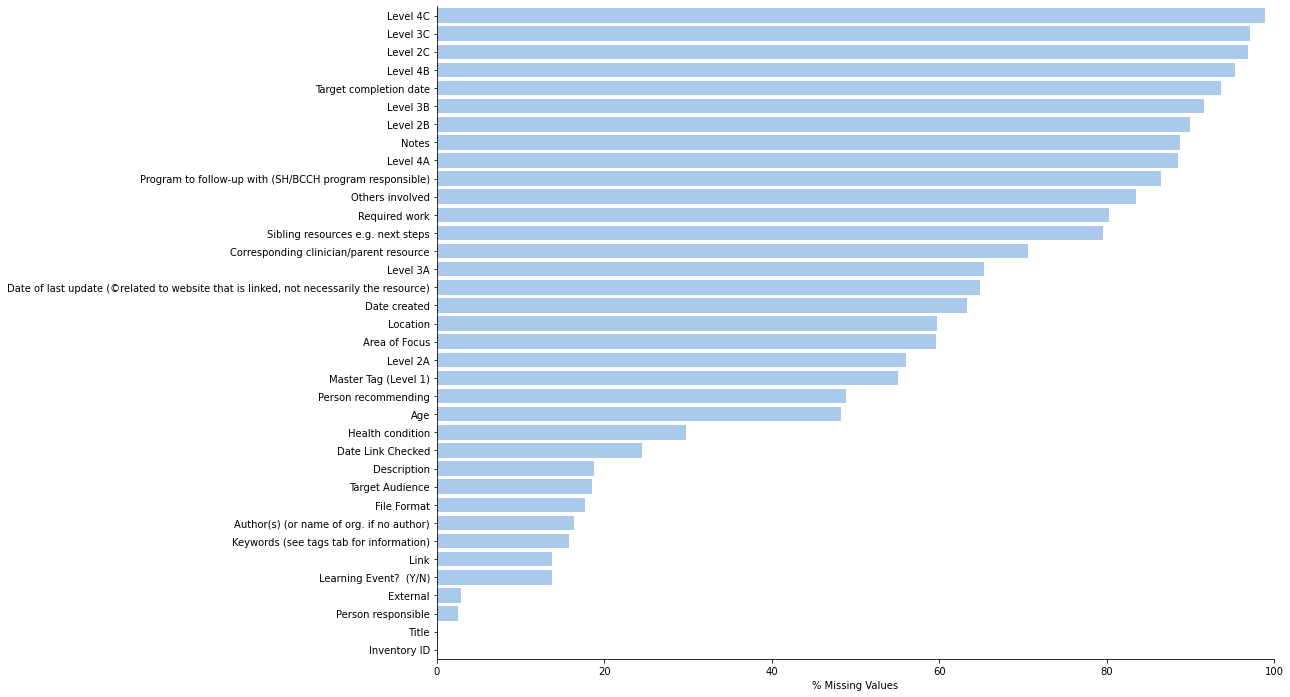

In [43]:
#plotting the percentage of missing values in each column
data_length = len(new_data_dropped_ID_Title)
data_null = (new_data_dropped_ID_Title.isnull().sum().sort_values(ascending=False)*100/len(new_data_dropped_ID_Title))
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="",
       xlabel="% Missing Values")
sns.barplot(x=data_null.values, y=data_null.index, color="b")
sns.despine()

In [15]:
new_data_dropped_ID_Title.to_csv('new_data_dropped_ID_Title.csv', index=False)

In [16]:
new_data_dropped_ID = new_data.drop_duplicates(subset='Inventory ID', keep="first")
new_data_dropped_ID.reset_index(drop=True)
new_data_dropped_ID 

,Inventory ID,Title,Person responsible,Others involved,Required work,Target completion date,Program to follow-up with (SH/BCCH program responsible),External,Author(s) (or name of org. if no author),Date created,"Date of last update (©related to website that is linked, not necessarily the resource)",Link,Date Link Checked,Target Audience,File Format,Master Tag (Level 1),Level 2A,Level 3A,Level 4A,Level 2B,Level 3B,Level 4B,Level 2C,Level 3C,Level 4C,Description,Health condition,Area of Focus,Keywords (see tags tab for information),Learning Event? (Y/N),Corresponding clinician/parent resource,Sibling resources e.g. next steps,Notes,Person recommending,Age,Location
0,1,[insert other DCD Advocacy Toolkit resources] ...,Stephanie,Jill Z.,Review to ensure web-ready; add tags,NaN,NaN,Internal,"Ivonne M. , OT & Stephanie G. , OT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DCD,NaN,NaN,N,Management of Developmental Coordination Disor...,DCD saved search; DCD management brief overview,NaN,Ivonne M.,NaN,NaN
1,2,2020 Child-Bright Virtual Symposium Session Re...,Claire/Salina,NaN,NaN,NaN,NaN,External,Child-Bright Network and Strategy for Patient-...,2020,2022,https://www.child-bright.ca/virtual-symposium,"May 31, 2022","clinicians, researchers, families/caregivers",Web link,Making Treatment Choices,"Learn About Treatment, Care and Activities","Function, Activity and 'How To' Resources",NaN,"Learn About Treatment, Care and Activities",Health Condition-specific Resources,NaN,NaN,NaN,NaN,The 2020 CHILD-BRIGHT Virtual Symposium was a ...,Other,NaN,"webinars, congenital heart disease, genomic te...",Y,N,N,NaN,Kim,All,Canada-Wide
2,3,360 Cognitive Connections,Claire,NaN,NaN,NaN,NaN,External,NaN,NaN,NaN,https://www.efpractice.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michelle L.,NaN,NaN
3,4,5. Plan A: Standardized measures of IQ and dev...,Claire,NaN,NaN,NaN,NaN,Internal,Jennifer Engle (BC Campus),NaN,NaN,https://pressbooks.bccampus.ca/jengle/chapter/...,"September 9, 2021",clinicians,web link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resource that aids in understanding factors to...,no specific diagnosis,NaN,"assessment, test, IQ, disability, special popu...",N,NaN,NaN,NaN,Jen E.,All,NaN
4,6,A Clinical Application Guide to Standardized W...,Debbie,NaN,NaN,NaN,Positioning Mobility Team,External,University of Colorado Denver,2013,NaN,https://www1.ucdenver.edu/centers/center-for-i...,May 31-21,"clinicians, researchers",web link,"Services, Supports & Community Resources",Learn About Assessments,Other Assessment Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resources that promote the adoption and use of...,"Cerebral palsy , Brain injury, concussion, Dev...","Positioning, mobility, lower body, Assistive t...","wheelchair, mobility, assistive device, evalua...",N,N,NaN,NaN,Debbie,All,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,1596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1800,1597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,1599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
new_data_dropped_ID.to_csv('new_data_dropped_ID.csv', index=False)

In [18]:
new_data_dropped_Title = new_data.drop_duplicates(subset='Title', keep="first")
new_data_dropped_Title.reset_index(drop=True)
new_data_dropped_Title 

,Inventory ID,Title,Person responsible,Others involved,Required work,Target completion date,Program to follow-up with (SH/BCCH program responsible),External,Author(s) (or name of org. if no author),Date created,"Date of last update (©related to website that is linked, not necessarily the resource)",Link,Date Link Checked,Target Audience,File Format,Master Tag (Level 1),Level 2A,Level 3A,Level 4A,Level 2B,Level 3B,Level 4B,Level 2C,Level 3C,Level 4C,Description,Health condition,Area of Focus,Keywords (see tags tab for information),Learning Event? (Y/N),Corresponding clinician/parent resource,Sibling resources e.g. next steps,Notes,Person recommending,Age,Location
0,1,[insert other DCD Advocacy Toolkit resources] ...,Stephanie,Jill Z.,Review to ensure web-ready; add tags,NaN,NaN,Internal,"Ivonne M. , OT & Stephanie G. , OT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DCD,NaN,NaN,N,Management of Developmental Coordination Disor...,DCD saved search; DCD management brief overview,NaN,Ivonne M.,NaN,NaN
1,2,2020 Child-Bright Virtual Symposium Session Re...,Claire/Salina,NaN,NaN,NaN,NaN,External,Child-Bright Network and Strategy for Patient-...,2020,2022,https://www.child-bright.ca/virtual-symposium,"May 31, 2022","clinicians, researchers, families/caregivers",Web link,Making Treatment Choices,"Learn About Treatment, Care and Activities","Function, Activity and 'How To' Resources",NaN,"Learn About Treatment, Care and Activities",Health Condition-specific Resources,NaN,NaN,NaN,NaN,The 2020 CHILD-BRIGHT Virtual Symposium was a ...,Other,NaN,"webinars, congenital heart disease, genomic te...",Y,N,N,NaN,Kim,All,Canada-Wide
2,3,360 Cognitive Connections,Claire,NaN,NaN,NaN,NaN,External,NaN,NaN,NaN,https://www.efpractice.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michelle L.,NaN,NaN
3,4,5. Plan A: Standardized measures of IQ and dev...,Claire,NaN,NaN,NaN,NaN,Internal,Jennifer Engle (BC Campus),NaN,NaN,https://pressbooks.bccampus.ca/jengle/chapter/...,"September 9, 2021",clinicians,web link,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resource that aids in understanding factors to...,no specific diagnosis,NaN,"assessment, test, IQ, disability, special popu...",N,NaN,NaN,NaN,Jen E.,All,NaN
4,6,A Clinical Application Guide to Standardized W...,Debbie,NaN,NaN,NaN,Positioning Mobility Team,External,University of Colorado Denver,2013,NaN,https://www1.ucdenver.edu/centers/center-for-i...,May 31-21,"clinicians, researchers",web link,"Services, Supports & Community Resources",Learn About Assessments,Other Assessment Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resources that promote the adoption and use of...,"Cerebral palsy , Brain injury, concussion, Dev...","Positioning, mobility, lower body, Assistive t...","wheelchair, mobility, assistive device, evalua...",N,N,NaN,NaN,Debbie,All,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,1477,Right Review Tool,Stephanie,NaN,NaN,NaN,NaN,External,Andrea Tricco,NaN,2022,https://rightreview.knowledgetranslation.net,"May 4, 2022",Researchers,web link,"Tools to Find, Evaluate and Use Health Informa...",Move Evidence into Action (Step 4 and 5),Create Knowledge Products (Knowledge Synthesis),For Other Groups,NaN,NaN,NaN,NaN,NaN,NaN,This tool provides guidance and supporting mat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,1478,Today's Kids in Motion magazine for parents ra...,Debbie,NaN,NaN,NaN,NaN,External,BCS Group,unknown,NaN,https://www.todayskids.ca,May 12-22,"Families/caregivers, Clinicians, Educators",web link,"Services, Supports & Community Resources",Recreation and Leisure Activities,Physical Activity,NaN,Recreation and Leisure Activities,Arts and Cultural Programs,NaN,Advocating for Your Family's Needs,NaN,NaN,Online publication providing exchange of infor...,All,All,"health, lifestyle, participation, acceptance, ...",N,N,NaN,NaN,Debbie,

In [19]:
new_data_dropped_Title.to_csv('new_data_dropped_Title.csv', index=False)